* `Import Libraries`

In [46]:
import os
import joblib
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.utils.class_weight import compute_class_weight

* `load data`

In [47]:
file_path = os.path.join(os.getcwd(), '..', 'data', 'breast_cancer.csv')
df = pd.read_csv(file_path)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


* `Data Cleaning`

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [49]:
df =  df.iloc[0:,1:-1]
df.columns = df.columns.str.strip().str.replace(' ','_')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave_points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [50]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


array([[<Axes: title={'center': 'radius_mean'}>,
        <Axes: title={'center': 'texture_mean'}>,
        <Axes: title={'center': 'perimeter_mean'}>,
        <Axes: title={'center': 'area_mean'}>,
        <Axes: title={'center': 'smoothness_mean'}>],
       [<Axes: title={'center': 'compactness_mean'}>,
        <Axes: title={'center': 'concavity_mean'}>,
        <Axes: title={'center': 'concave_points_mean'}>,
        <Axes: title={'center': 'symmetry_mean'}>,
        <Axes: title={'center': 'fractal_dimension_mean'}>],
       [<Axes: title={'center': 'radius_se'}>,
        <Axes: title={'center': 'texture_se'}>,
        <Axes: title={'center': 'perimeter_se'}>,
        <Axes: title={'center': 'area_se'}>,
        <Axes: title={'center': 'smoothness_se'}>],
       [<Axes: title={'center': 'compactness_se'}>,
        <Axes: title={'center': 'concavity_se'}>,
        <Axes: title={'center': 'concave_points_se'}>,
        <Axes: title={'center': 'symmetry_se'}>,
        <Axes: title={'ce

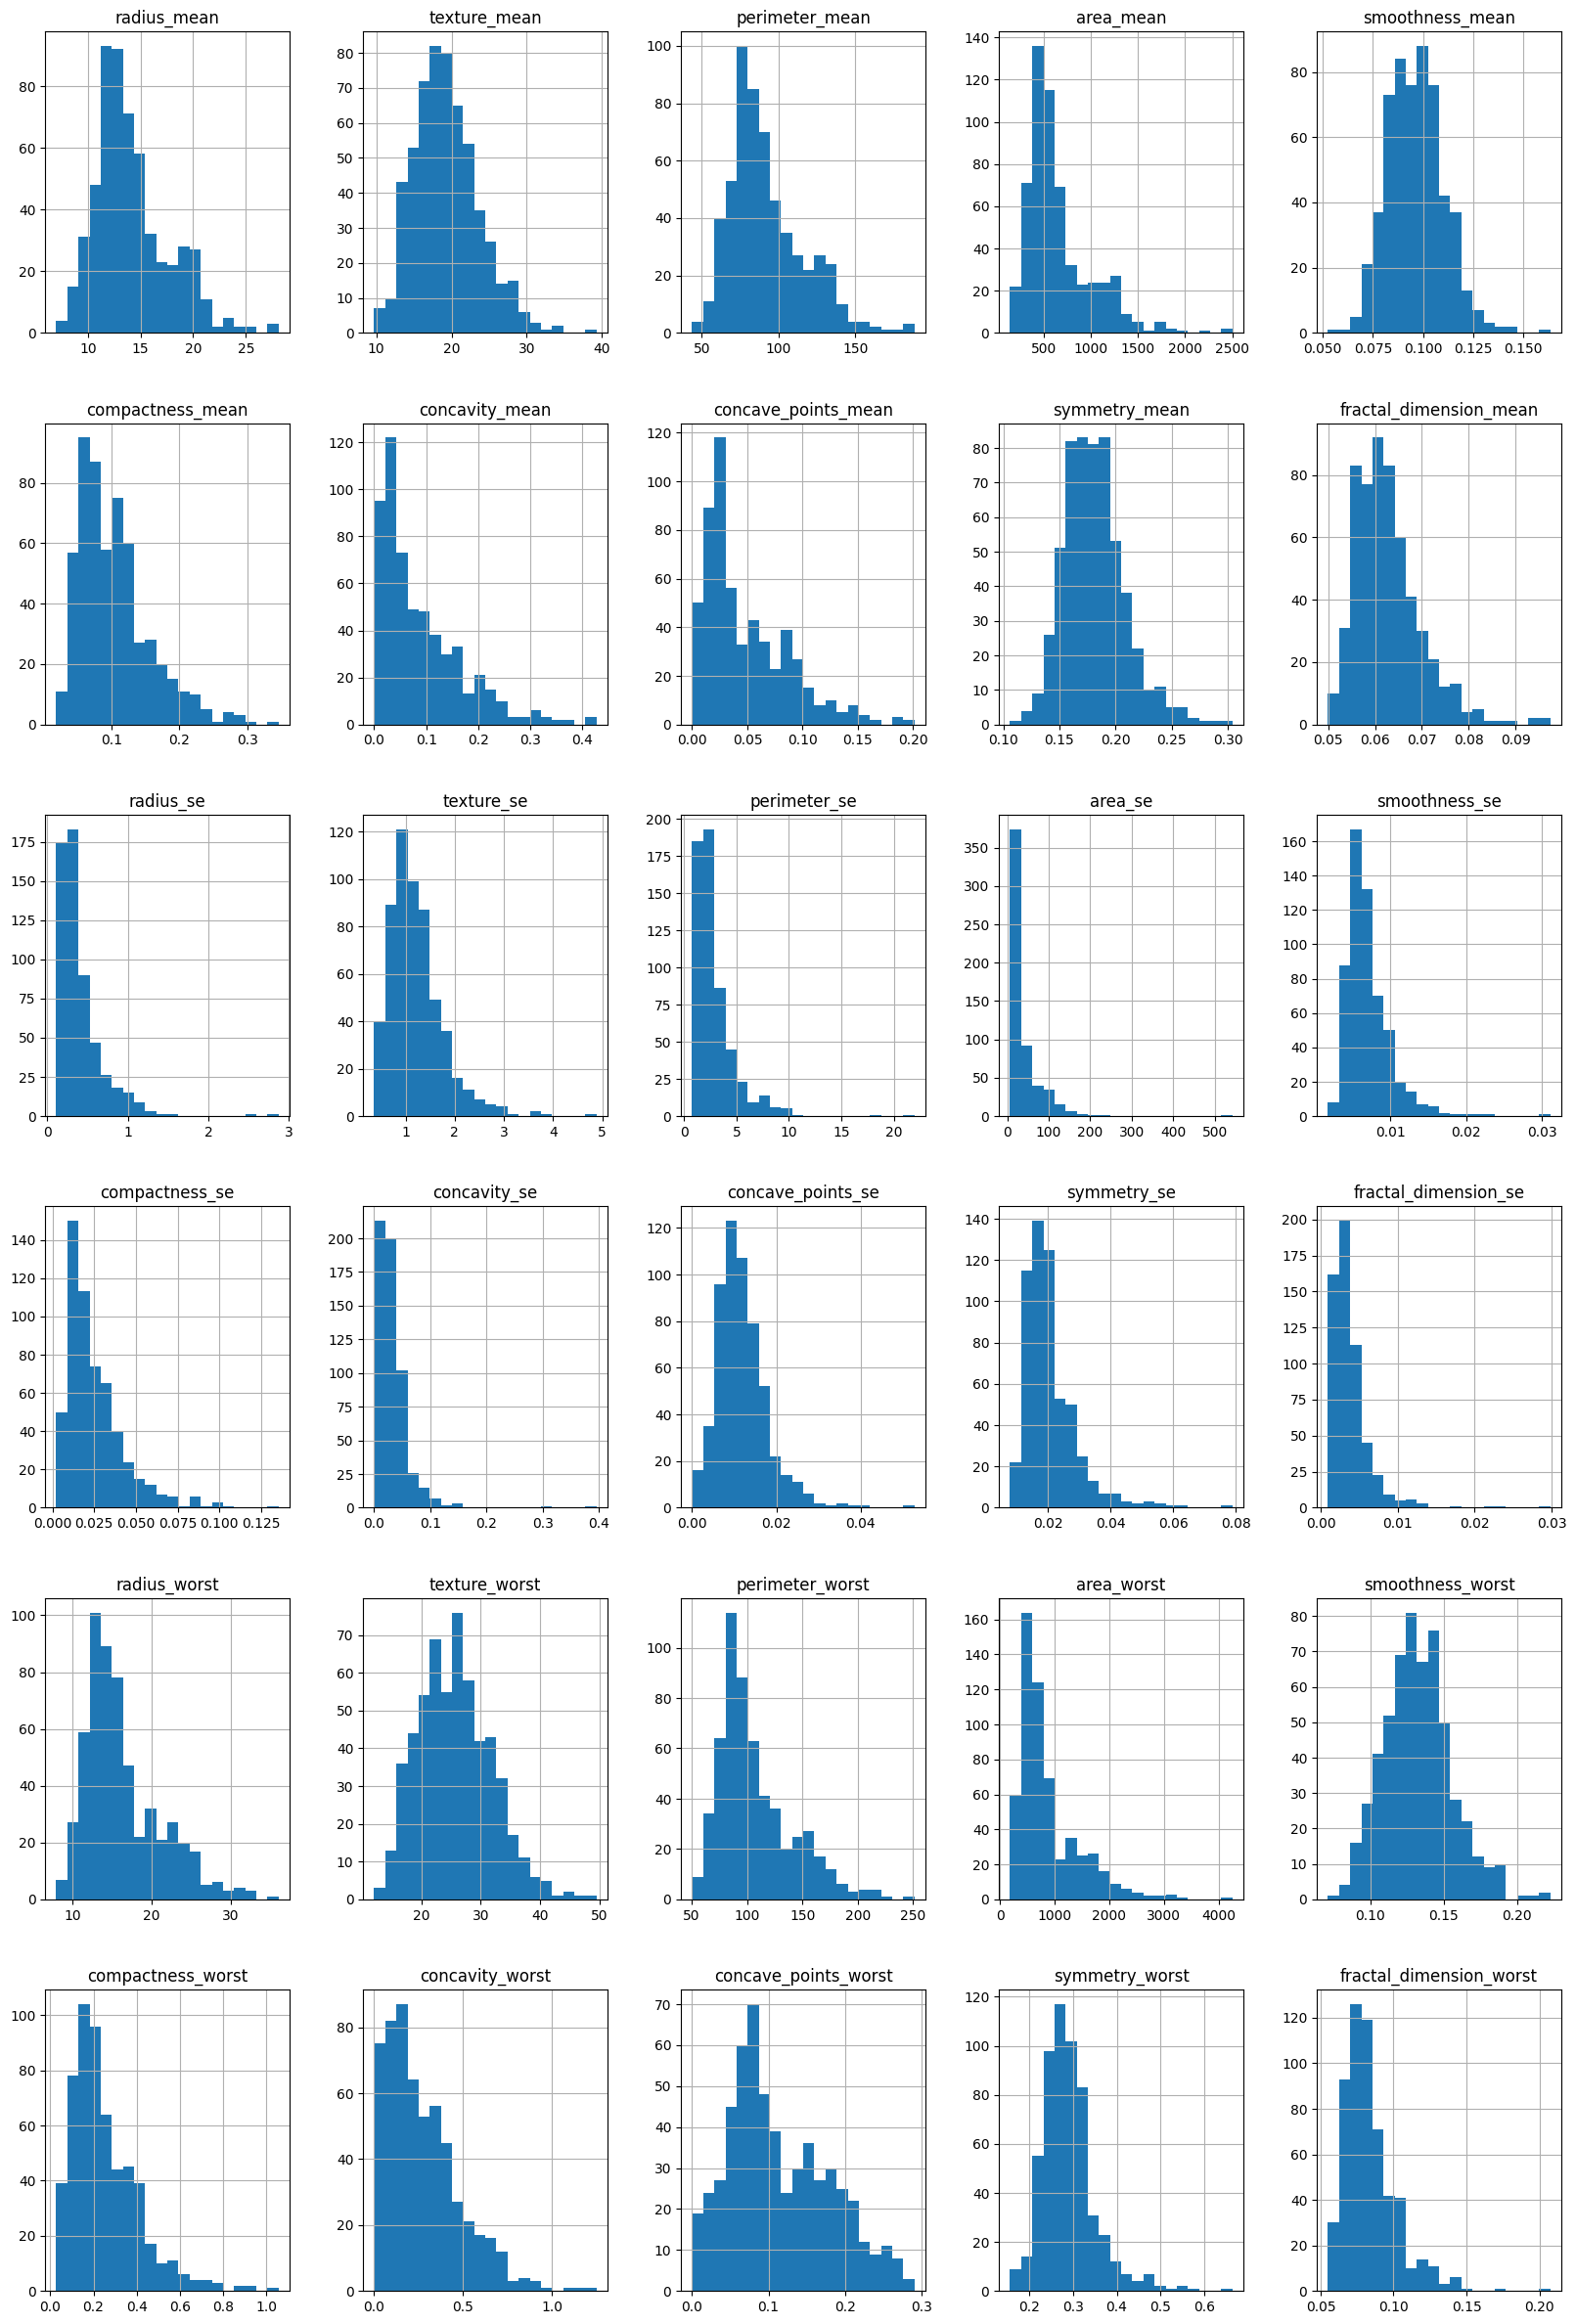

In [51]:
df.hist(bins = 20, figsize=(20,30))


In [52]:
df['diagnosis'] = df['diagnosis'].replace({'M' : 1, 'B' : 0})

C:\Users\DELL\AppData\Local\Temp\ipykernel_14888\122682415.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['diagnosis'] = df['diagnosis'].replace({'M' : 1, 'B' : 0})


array([[<Axes: title={'center': 'diagnosis'}>,
        <Axes: title={'center': 'radius_mean'}>,
        <Axes: title={'center': 'texture_mean'}>,
        <Axes: title={'center': 'perimeter_mean'}>,
        <Axes: title={'center': 'area_mean'}>,
        <Axes: title={'center': 'smoothness_mean'}>],
       [<Axes: title={'center': 'compactness_mean'}>,
        <Axes: title={'center': 'concavity_mean'}>,
        <Axes: title={'center': 'concave_points_mean'}>,
        <Axes: title={'center': 'symmetry_mean'}>,
        <Axes: title={'center': 'fractal_dimension_mean'}>,
        <Axes: title={'center': 'radius_se'}>],
       [<Axes: title={'center': 'texture_se'}>,
        <Axes: title={'center': 'perimeter_se'}>,
        <Axes: title={'center': 'area_se'}>,
        <Axes: title={'center': 'smoothness_se'}>,
        <Axes: title={'center': 'compactness_se'}>,
        <Axes: title={'center': 'concavity_se'}>],
       [<Axes: title={'center': 'concave_points_se'}>,
        <Axes: title={'cent

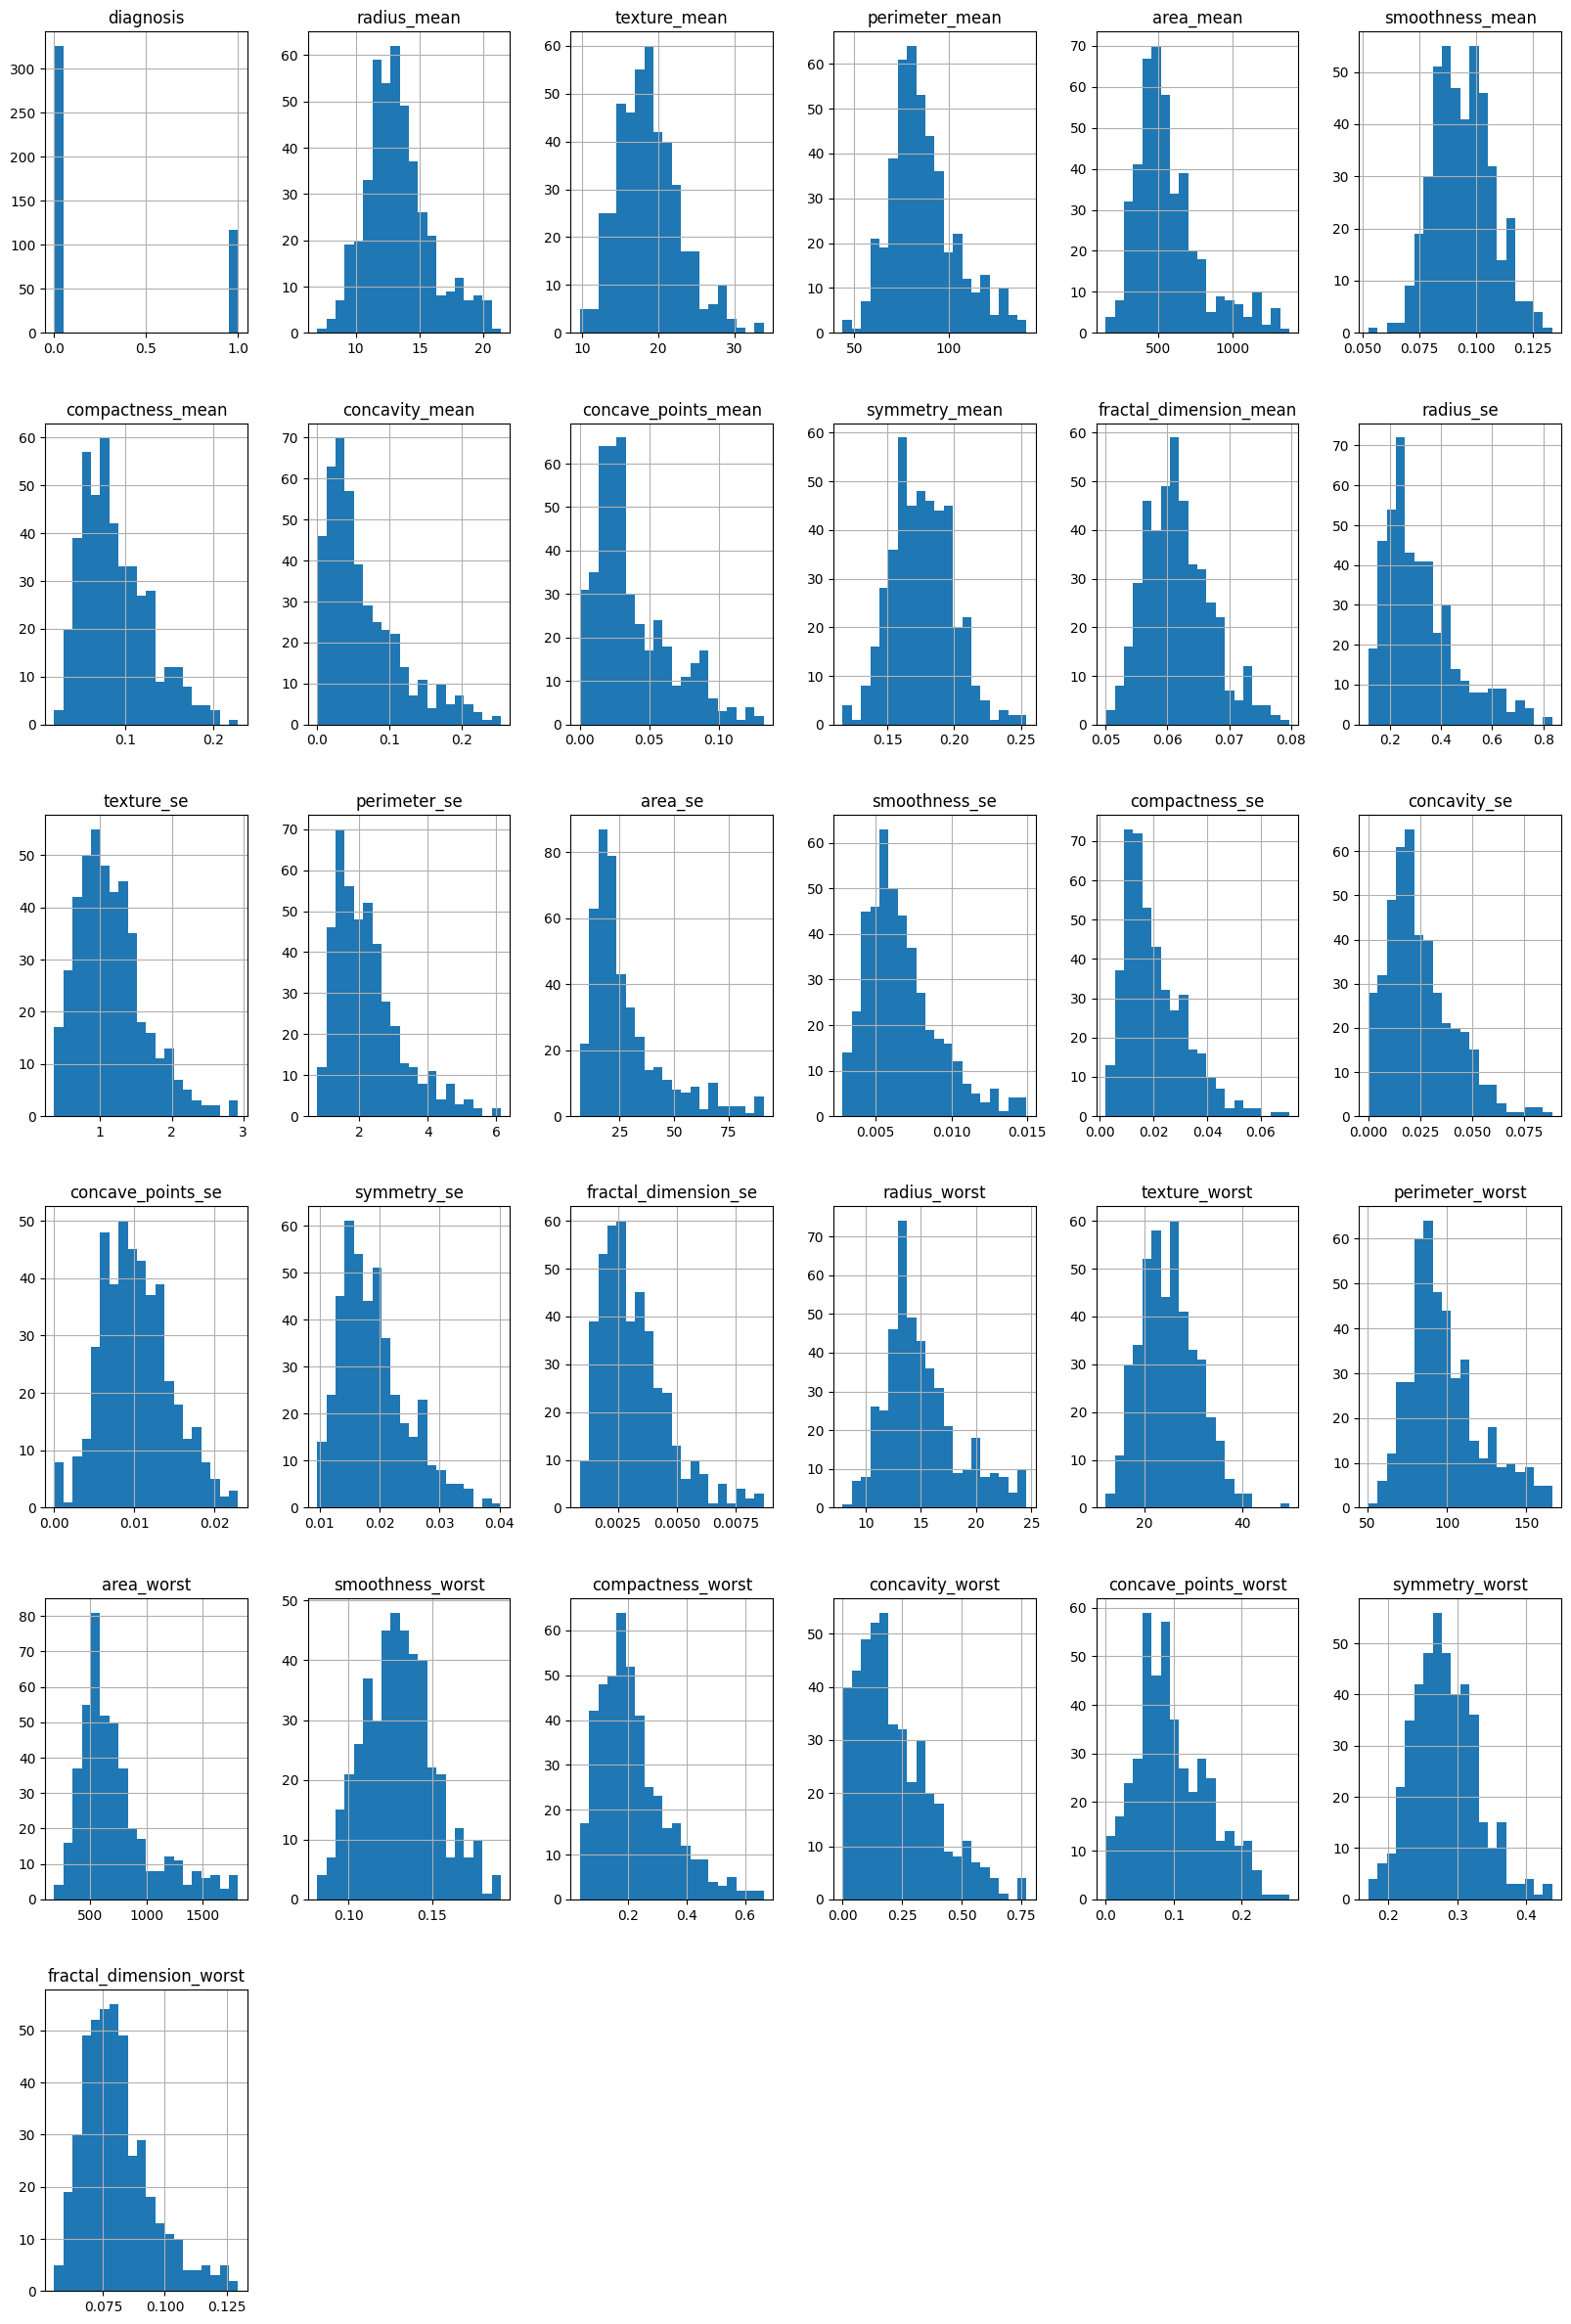

In [53]:
columns = df.columns.tolist()
for x in columns:
    Q1 = df[x].quantile(0.25)
    Q3 = df[x].quantile(0.75)
    IQR = Q3 - Q1 
    df = df[df[x] < (Q3 + 2.5*IQR)]

df.hist(bins = 20, figsize=(20,30))

* `EDA`

<Axes: xlabel='radius_mean', ylabel='Count'>

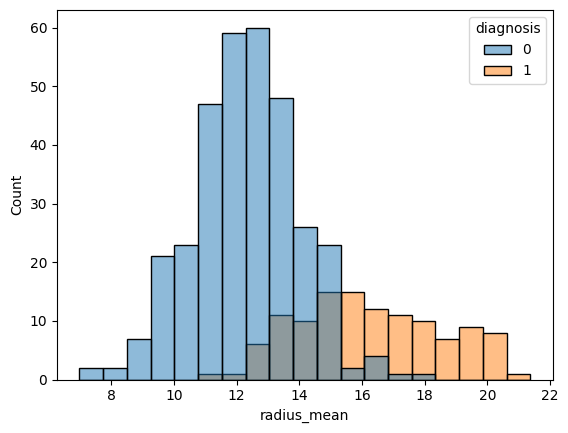

In [54]:
sns.histplot(data = df, x = 'radius_mean', hue='diagnosis')

<Axes: xlabel='texture_mean', ylabel='Count'>

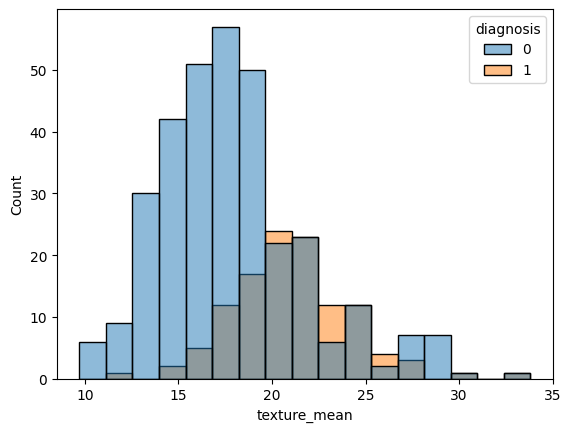

In [55]:
sns.histplot(data = df, x = 'texture_mean', hue='diagnosis')

* `Split Data`

In [56]:
X = df.drop(columns = ['diagnosis'])
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=45, stratify=y)


* `Feature selection`

In [57]:

_, p_val = f_classif(X = X_train, y = y_train)
p_val = p_val.tolist()
features = columns[1:]
selected_features  = []
for i in range(len(p_val)):
    if p_val[i] < 0.05:
        selected_features.append(features[i])

X_train = X_train[selected_features]
X_test = X_test[selected_features]

In [58]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((354, 27), (354,), (89, 27), (89,))

* `Pipeline`

In [59]:
preprocessor = Pipeline([
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler())
])

X_train_final = preprocessor.fit_transform(X_train)
X_test_final = preprocessor.transform(X_test)

In [60]:
models_path = os.path.join(os.getcwd(), '..', 'models')
joblib.dump(preprocessor,  os.path.join(models_path, 'preprocessor.pkl'))

['f:\\College\\Senior 1\\Machine Learning\\Breast_Canser\\notebooks\\..\\models\\preprocessor.pkl']

* `Impalance`

In [61]:
over = SMOTE(random_state=45, sampling_strategy=0.7, k_neighbors=5)
X_train_resampled, y_train_resampled = over.fit_resample(X_train_final, y_train)

* `Logistic Regression`

In [62]:
log_clf = LogisticRegression(C = 1.5)
log_clf.fit(X_train_resampled, y_train_resampled)

y_train_pred_log = log_clf.predict(X_train_final)
y_test_pred_log = log_clf.predict(X_test_final)

score_train_log = f1_score(y_pred=y_train_pred_log, y_true=y_train)
score_test_log = f1_score(y_pred=y_test_pred_log, y_true=y_test)

score_train_log, score_test_log


(0.972972972972973, 0.9565217391304348)

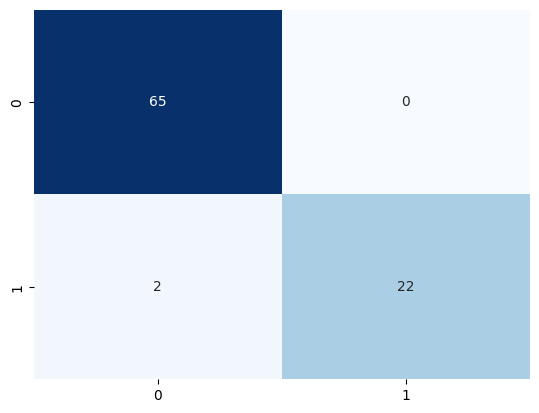

In [63]:
sns.heatmap(confusion_matrix(y_pred=y_test_pred_log, y_true=y_test), annot=True, cbar=False, cmap='Blues')
plt.show()

In [64]:
print(classification_report(y_pred=y_test_pred_log, y_true=y_test))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        65
           1       1.00      0.92      0.96        24

    accuracy                           0.98        89
   macro avg       0.99      0.96      0.97        89
weighted avg       0.98      0.98      0.98        89



In [65]:
joblib.dump(log_clf ,os.path.join(models_path, 'logistic.pkl'))

['f:\\College\\Senior 1\\Machine Learning\\Breast_Canser\\notebooks\\..\\models\\logistic.pkl']

In [66]:
class_weights = compute_class_weight(y=y_train,  class_weight='balanced', classes=y_train.unique())
class_weights = class_weights/ sum(class_weights)
class_weights = dict(zip(np.unique(y_train), class_weights))
class_weights


{np.int64(0): np.float64(0.2627118644067796),
 np.int64(1): np.float64(0.7372881355932204)}

In [67]:
forest_base = RandomForestClassifier(max_depth=5, class_weight=class_weights, n_estimators=150 , random_state=45)

params = {
    'max_depth': np.arange(4,10,2),
    'n_estimators': np.arange(20,200,20)
}

forest_tuned = GridSearchCV(param_grid=params, estimator=forest_base, cv = 5, scoring='f1', verbose=4, n_jobs=-1)
forest_tuned.fit(X_train_final, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


,estimator,RandomForestC...ndom_state=45)
,param_grid,"{'max_depth': array([4, 6, 8]), 'n_estimators': array([ 20, ...40, 160, 180])}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,5
,verbose,4
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,np.int64(60)


In [68]:
forest_tuned.best_params_, forest_tuned.best_score_

({'max_depth': np.int64(6), 'n_estimators': np.int64(60)},
 np.float64(0.933437555202261))

In [69]:
forest = forest_tuned.best_estimator_

y_train_pred_forest = forest.predict(X_train_final)
y_test_pred_forest = forest.predict(X_test_final)

score_train_forest = f1_score(y_pred=y_train_pred_forest, y_true=y_train)
score_test_forest = f1_score(y_pred=y_test_pred_forest, y_true=y_test)

score_train_forest, score_test_forest

(1.0, 0.9130434782608695)

In [70]:
feature_importance = pd.DataFrame({'features':selected_features, 'importance': forest_tuned.best_estimator_.feature_importances_}).sort_values('importance', ascending=False)
feature_importance

,features,importance
19,perimeter_worst,0.161678
20,area_worst,0.148293
17,radius_worst,0.121600
24,concave_points_worst,0.098763
7,concave_points_mean,0.087568
6,concavity_mean,0.064057
23,concavity_worst,0.052549
11,area_se,0.047296
2,perimeter_mean,0.033984
3,area_mean,0.025837


In [71]:
joblib.dump(forest, os.path.join(models_path, 'forest.pkl'))

['f:\\College\\Senior 1\\Machine Learning\\Breast_Canser\\notebooks\\..\\models\\forest.pkl']

In [72]:
xgb_base = XGBClassifier(n_estimator= 150, max_depth = 5, reg_lambda= 5, learning_rate = 0.001, random_state = 45, objective='binary:logistic')

xgb_tuned = GridSearchCV(param_grid=params, estimator=xgb_base, cv=5, n_jobs=-1, verbose=4, scoring='f1')
xgb_tuned.fit(X_train_resampled, y_train_resampled)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


c:\Users\DELL\anaconda3\envs\udemy\Lib\site-packages\xgboost\training.py:183: UserWarning: [06:30:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,estimator,"XGBClassifier...obs=None, ...)"
,param_grid,"{'max_depth': array([4, 6, 8]), 'n_estimators': array([ 20, ...40, 160, 180])}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,5
,verbose,4
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'binary:logistic'


In [73]:
xgb_tuned.best_estimator_,xgb_tuned.best_score_

(XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               feature_weights=None, gamma=None, grow_policy=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=0.001, max_bin=None, max_cat_threshold=None,
               max_cat_to_onehot=None, max_delta_step=None,
               max_depth=np.int64(4), max_leaves=None, min_child_weight=None,
               missing=nan, monotone_constraints=None, multi_strategy=None,
               n_estimator=150, n_estimators=np.int64(20), n_jobs=None, ...),
 np.float64(0.0))

In [74]:
selected_features

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave_points_mean',
 'symmetry_mean',
 'radius_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave_points_se',
 'symmetry_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave_points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']